In [5]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#line below displays matplotlib graphs inline
%matplotlib inline
matplotlib.style.use('ggplot')#select matplotlib style

In [6]:
#import dependencies
import re

users = ['Advait Joshi', 'Other Person']#list of members messaging one another
filename = 'whatsapp.txt'#filepath of file containing whatsapp data

def get_dataframe(users = users, filename = 'whatsapp.txt'):
    '''Returns dataframe with all the data from txt file'''
    reg = '|'.join(users)

    # get messages into dataframe
    with open(filename, 'r', encoding = 'utf-8') as f:
        line_reg_obj = re.compile(r'(\d+/\d+/\d{2}), (\d\d:\d\d)\s-\s(' + reg + '):\s(.*)') #create regular expression to separate the messages' components
        info = line_reg_obj.findall(f.read())#find all matches for regular expression
        data = pd.DataFrame(info, columns=['Date', 'Time', 'Sender', 'Message'])#create dataframe

    data.to_csv('whatsapp.csv', index = False, header = False)#export data to csv for later retrieval
    return data

In [64]:
import datetime

def get_plot_data(date_or_time, data):
    '''Returns dataframe with sender, frequency, and date/time information'''
    plot_data = pd.DataFrame(columns=[date_or_time, 'Sender', 'Frequency'])#create dataframe to be populated
    
    for sender in data['Sender'].unique():#populate information for each unique sender
        a = dict(data[data['Sender'] == sender].groupby(data[date_or_time]).count()[date_or_time])#creates dictionary of series obtained 
        b = pd.DataFrame(columns=[date_or_time, 'Sender', 'Frequency'])#create temporary dataframe to append values to plot_data
        b[date_or_time] = a.keys()#append date_or_time values to b
        b['Frequency'] = a.values()#append frequency values to b
        b['Sender'] = sender#append sender information to b
        plot_data = pd.concat([plot_data, b])#append b to plot_data
    
    #if function implemented to allow code reuse in function
    if date_or_time == 'Time':
        op1 = lambda x: datetime.datetime.strptime(x, '%H:%M')#create lambda function to convert time values to datetime object
    elif date_or_time == 'Date':
        op1 = lambda x: datetime.datetime.strptime(x, '%m/%d/%y')#create lambda function to convert date values to datetime object
    op2 = lambda x: matplotlib.dates.date2num(x) #create lambda function to convert date_or_time values to matplotlib date object
    
    plot_data[date_or_time] = plot_data[date_or_time].apply(op1)#apply lambda function 1
    plot_data[date_or_time] = plot_data[date_or_time].apply(op2)#apply lambda function 2
    
    return plot_data

def set_title_and_legend(ax, x_axis):
    '''Sets title, labels, and legend for graph where fucntion is called'''
    ax.set_title('Graph of Frequency against ' + x_axis)#set x-axis title
    ax.set_xlabel(x_axis)#set x-axis label
    ax.set_ylabel('Frequency')#set y-axis label
    
    ax.legend()#set legend

def time_scatter_plot(data):
    '''Creates scatter plot of time against frequency from data dataframe'''
    colors = ['red', 'blue', 'yellow', 'green', 'purple', 'black', 'pink', 'cyan', 'orange']#list of colors used for different senders
    x_axis = 'Time'#set x-axis lable and value
    plot_data = get_plot_data(x_axis, data)#get data to be plotted

    fig = plt.figure(figsize = (16,8))#create figure
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])#set axes

    for sender, color in zip(plot_data['Sender'].unique(), colors):
        ax.scatter(x = x_axis, y = 'Frequency', data = plot_data[plot_data['Sender'] == sender], c = color, label = sender)#plot scatterplot for each unique sender

    ax.xaxis_date()#inform graph that dates will be plotted on the x-axis
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%H:%M'))#format x-axis values
    
    set_title_and_legend(ax, x_axis)#set title, labels, and legends
    fig.savefig(x_axis)#export graph as .png file
        
def date_line_plot(data):
    '''Creates line graph of date against frequency from data datafram'''
    colors = ['red', 'blue', 'yellow', 'green', 'purple', 'black', 'pink', 'cyan', 'orange']#list of colors used for different senders
    x_axis = 'Date'#set x-axis lable and value
    
    plot_data = get_plot_data(x_axis, data)#get data to be plotted
    plot_data.sort_values(x_axis, inplace = True)#sort date values to create smooth line graph
    
    fig = plt.figure(figsize = (16, 8))#create figure
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])#set axes
    
    for sender, color in zip(plot_data['Sender'].unique(), colors):
        temp = plot_data[plot_data['Sender'] == sender]
        ax.plot(temp[x_axis], temp['Frequency'], c = color, label = sender)#plot line graph for each unique sender
    
    ax.xaxis_date()#inform graph that dates will be plotted on the x-axis
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%d-%m-%y'))#format x-axis date values
    fig.autofmt_xdate()#beautify x-axis values
    
    set_title_and_legend(ax, x_axis)#set title, labels, and legends
    fig.savefig(x_axis)#export graph as .png file

In [65]:
def get_word_use_frequency(data):
    import collections

    msg_list = data['Message'].tolist()
    word_list = ' '.join(msg_list).lower().split()
    word_frame = pd.DataFrame.from_dict(dict(collections.Counter(word_list)), orient = 'index').reset_index()
    word_frame.columns = ['Word', 'Count']

    drop_words = ['a', 'i', 'u', 'the', '<media', 'omitted>', 'it', 'and', 'but', 'to', 'for', "it's", 'of', 'on']
    word_frame.replace(drop_words, np.nan, inplace = True)
    word_frame.dropna(subset = ['Word'], inplace=True)
    word_frame.sort_values(by = ['Count'], ascending = False, inplace = True)
    word_frame.reset_index()
    return word_frame

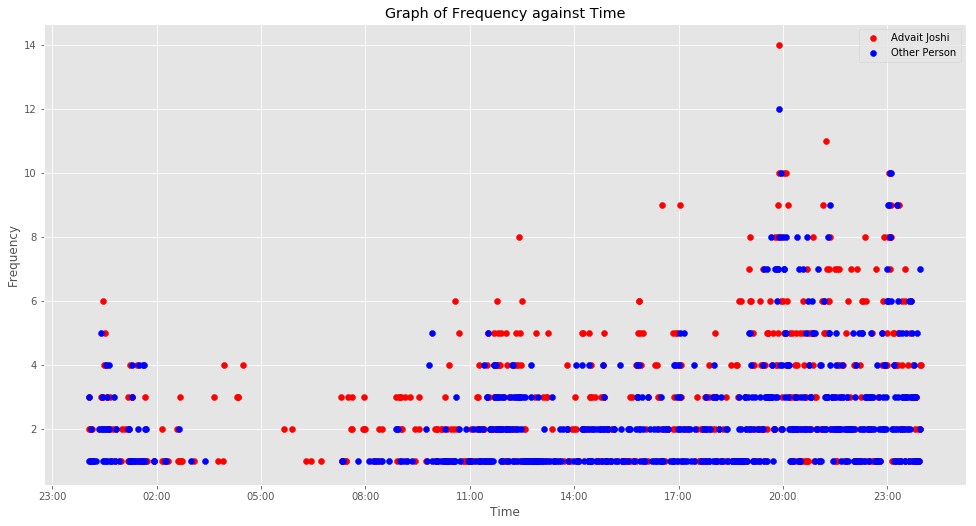

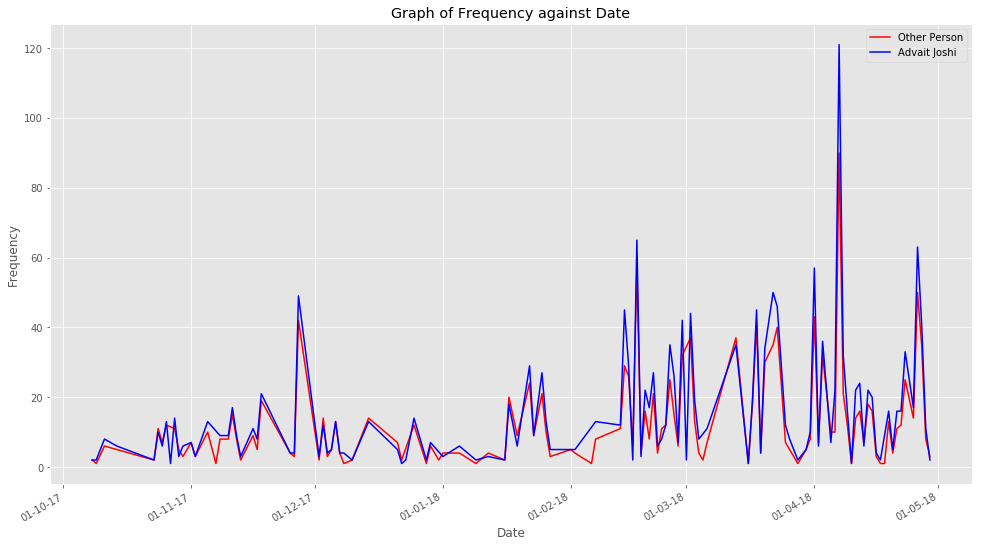

In [66]:
data = get_dataframe(users, filename)
time_scatter_plot(data)
date_line_plot(data)